In [1]:
!pip install py2neo

In [ ]:
# unit test 
# 1. Pick lets say 100 proteins and check if the interact with the same proteins as HetNet.
# 2. Comapare top 20 to top 20 of Hetnet
# 3. Compare mean and median of all the following queries.

In [2]:
from py2neo import Graph
graph = Graph("", auth=("", ""),name="development")

In [24]:
exploratory_query = """
MATCH (p1:Protein)-[:INTERACT_WITH]->(p2:Protein)
RETURN id(p1) AS id,p1.Name AS name, COUNT(p2.Name) AS numOfInteraction 
ORDER BY numOfInteraction 
"""
df = graph.run(exploratory_query).to_data_frame()

In [27]:
df.describe()

,id,numOfInteraction
count,1.564700e+04,15647.000000
mean,1.707232e+06,43.293858
std,1.872584e+05,104.025974
min,1.189868e+06,1.000000
25%,1.795278e+06,5.000000
50%,1.800431e+06,15.000000
75%,1.805464e+06,40.000000
max,1.810551e+06,2937.000000


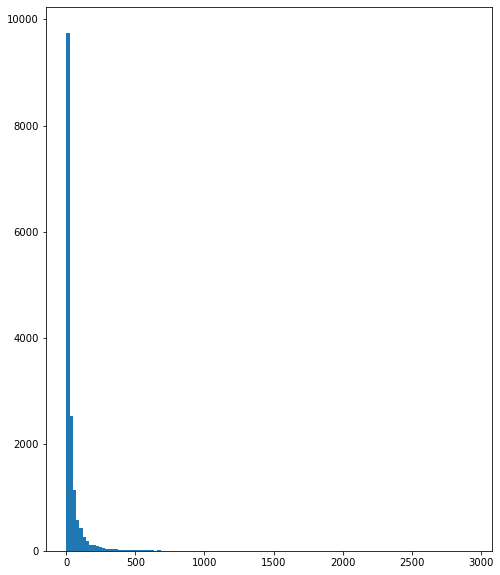

In [38]:

df.numOfInteraction.hist(bins=125, grid=False, figsize=(8,10) )
df = df.loc[(df["numOfInteraction"]>0) &  (df["numOfInteraction"]<60)]

<AxesSubplot:>

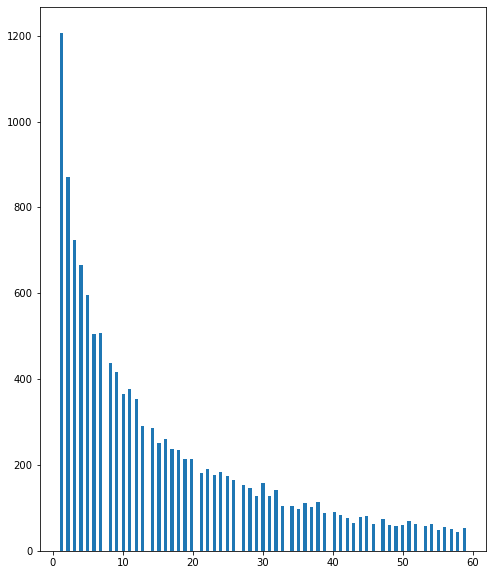

In [39]:
df.numOfInteraction.hist(bins=125, grid=False, figsize=(8,10) )

<AxesSubplot:>

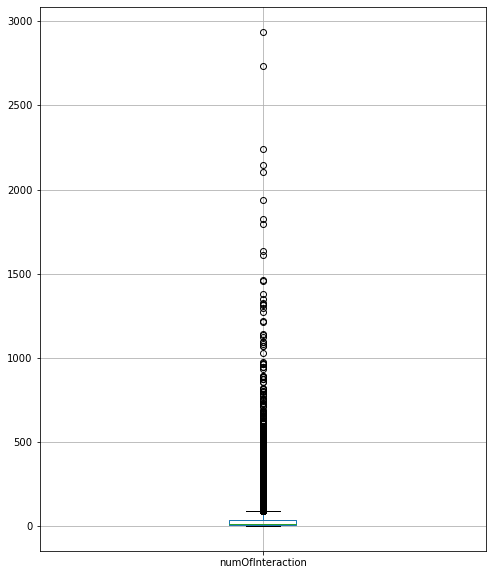

In [18]:
df.boxplot(column=['numOfInteraction'] , figsize=(8,10) )

In [22]:
exploratory_query = """
MATCH (p2:Protein)-[:INVOLVED_IN]->(g:GO)
RETURN g.GO_name AS name, COUNT(p2) AS numOfInteraction 
ORDER BY numOfInteraction DESC 

"""
df = graph.run(exploratory_query).to_data_frame()

<AxesSubplot:>

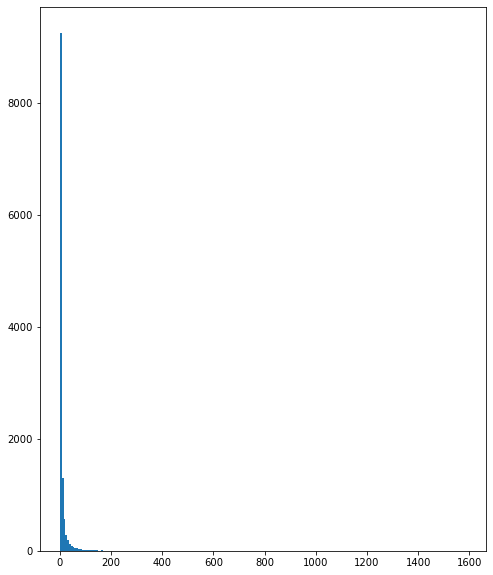

In [23]:
df.numOfInteraction.hist(bins=225, grid=False, figsize=(8,10) )

In [41]:
exploratory_query = """
MATCH (g:Gene)-[:RELATED_TO]->(d:Disease)
RETURN id(d) AS id,d.HP_name AS name, COUNT(g) AS numOfInteraction 
ORDER BY numOfInteraction 
"""
df = graph.run(exploratory_query).to_data_frame()
df

,id,name,numOfInteraction
0,1214602,Abnormality of the lens,1
1,1215227,Kernicterus,1
2,1215685,Morphological central nervous system abnormality,1
3,1215888,Horner syndrome,1
4,1216122,Type IV atherosclerotic lesion,1
...,...,...,...
1514,1499623,Nystagmus,887
1515,1499346,Scoliosis,906
1516,1495617,Microcephaly,1133
1517,1215160,Intellectual disability,1416


count    1519.000000
mean       40.709677
std        99.647584
min         1.000000
25%         4.000000
50%        12.000000
75%        35.000000
max      1458.000000
Name: numOfInteraction, dtype: float64

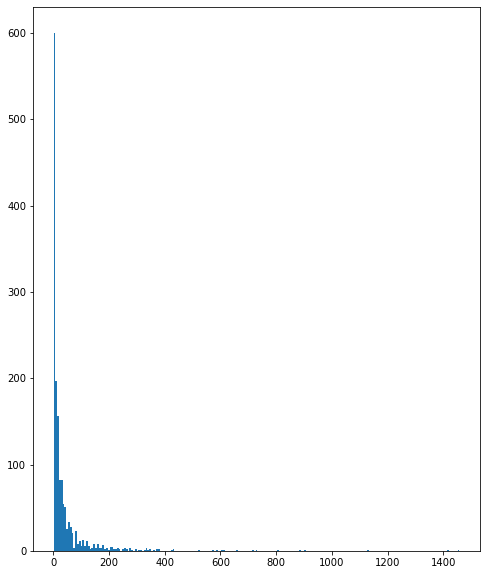

In [43]:
df.numOfInteraction.hist(bins=225, grid=False, figsize=(8,10) )
df.numOfInteraction.describe()

In [48]:
exploratory_query = """
MATCH (p:Phenotype)<-[:RELATED_TO]-(g:Gene)
RETURN id(p) AS id,p.HP_name AS name, COUNT(g) AS numOfInteraction 
ORDER BY numOfInteraction 
"""
df = graph.run(exploratory_query).to_data_frame()
df

,id,name,numOfInteraction
0,1214237,Abnormality of male external genitalia,1
1,1214282,Abnormality of reproductive system physiology,1
2,1214340,Abnormality of head or neck,1
3,1214361,Abnormality of lower lip,1
4,1214375,Abnormal parotid gland morphology,1
...,...,...,...
8797,1215160,Intellectual disability,1416
8798,1215161,Seizure,1458
8799,1215171,Global developmental delay,1564
8800,1214212,Autosomal dominant inheritance,1813


count    8802.00000
mean       23.14633
std        75.02272
min         1.00000
25%         2.00000
50%         5.00000
75%        16.00000
max      2752.00000
Name: numOfInteraction, dtype: float64

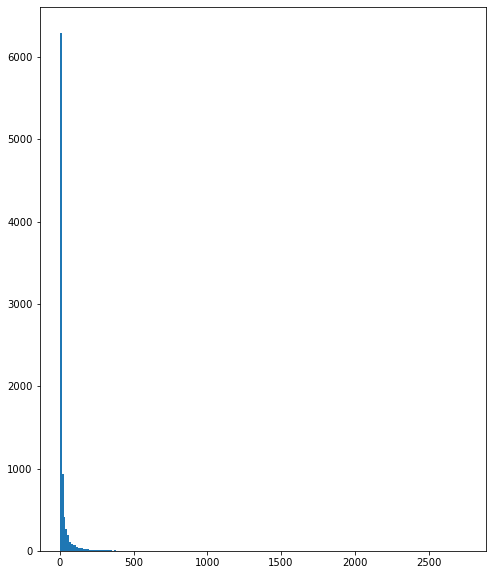

In [49]:
df.numOfInteraction.hist(bins=225, grid=False, figsize=(8,10) )
df.numOfInteraction.describe()